## Regression & Anova

---
1. 查看資料集
2. 敘述統計-繪圖
3. 迴歸分析
4. 變異數分析(anova)
5. 總結
---

### 1. 查看資料集

這裡使用的資料，是 kaggle 的健康保險費用資料，可以先前往下載。https://www.kaggle.com/mirichoi0218/insurance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
X = df.drop(["charges"],axis=1)
y = df["charges"]

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


資料解釋

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

此外也可以用describe()，看各個欄位的基本統計資訊：

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 2. 敘述統計-繪圖

在進行資料分析之前，先仔細觀察資料，看看能不能從裡面找到一些隱藏資訊。

例如，花萼長度(Sepal.Length)和花萼寬度(Sepal.Width)，既然都是花萼，可能會有相關，於是畫圖來看看：

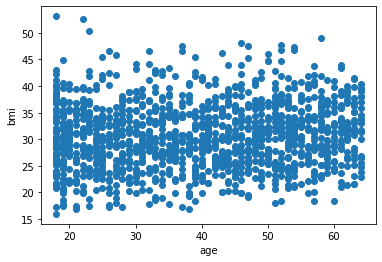

In [8]:
plt.xlabel("age")
plt.ylabel("bmi")
plt.scatter(df["age"],df["bmi"])

嗯…好像看不出什麼東西

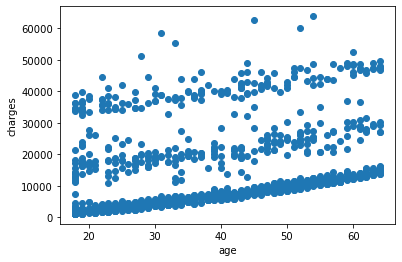

In [9]:
plt.xlabel("age")
plt.ylabel("charges")
plt.scatter(df["age"],df["charges"])

Bingo，可以觀察出來，年齡與健保費用，存在著些許的線性關係

並且再確認類別變數的影響，我們在上面那張圖標上顏色：

<Figure size 432x288 with 0 Axes>

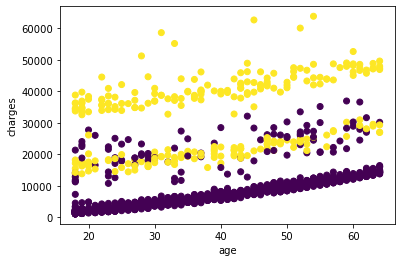

<Figure size 432x288 with 0 Axes>

In [10]:
plt.xlabel("age")
plt.ylabel("charges")
plt.scatter(df["age"],df["charges"],c=X["smoker_yes"])
plt.figure()


可以看出抽菸與否明顯影響著健保費用的多寡

並且看不同的類別的健保費盒鬚圖：

Text(0, 0.5, 'Charges')

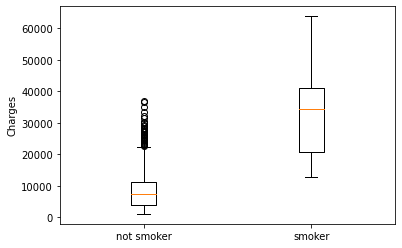

In [11]:
plt.boxplot([df[X["smoker_yes"] == 0]["charges"], 
             df[X["smoker_yes"] == 1]["charges"]],
             labels = ['not smoker', 'smoker'])

plt.ylabel('Charges')

### 3.迴歸分析

回歸分析是以一個或一組自變數（解釋變數、預測變項，Xi），來預測一個數值性的因變數（依變數、應變數、被預測變項，Y）。

相信大家都知道，簡單迴歸表示只有一個Y；複回歸則允許多個Y存在。

在這裡，我們以Sepal.Length為依變數(Y)，以Sepal.Width、Petal.Length、Petal.Width為自變數(X)，進行迴歸分析：

In [12]:
import statsmodels.api as sm
from scipy import stats

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
X = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:17:28   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

從報表中來看，我們可以獲得許多資訊：

- 根據p-value，age / bmi / children / smoker_yes / region_southeast 呈現統計顯著，可能代表重要的變數

- R-squared: 0.751 ； Adj R-squared: 0.749，表示模型預測能力不錯。


然而，當我們建立出一個線性回歸時，必須要確認其殘差(residual)是否符合下面三個假設：

1. 常態性(Normality)

2. 獨立性(Independence)

3. 變異數同質性(Homogeneity of Variance)

故，首先我們要先從回歸模型中找到殘差的值

In [15]:
est2.resid

0       -8408.789028
1       -1723.050534
2       -2257.526491
3       18229.640447
4       -1725.638186
            ...     
1333    -1750.775386
1334    -1305.950009
1335    -2519.298986
1336      761.360061
1337    -7944.262968
Length: 1338, dtype: float64

### 常態性假設

shapiro.test 函式可以用來檢驗殘差的常態性：

In [16]:
shapiro_test = stats.shapiro(est2.resid)
shapiro_test

(0.8989448547363281, 8.385207079104829e-29)

由於虛無假設H0:殘差服從常態分配，因為p-value > 0.05，代表不會拒絕H0。

### 獨立性假設

要檢驗殘差的獨立性，可以使用durbinWatson Test

In [17]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(est2.resid)

2.0884229986673084

Test statistic value of 0: Perfect positive autocorrelation

Test statistic value 0f 2: No autocorrelation

Test statistic value of 4: Perfect negative autocorrelation

以準則來看殘差具有獨立性

### 變異數同質性假設

要檢驗殘差的變異數同質性，可以使用 Breusch–Pagan test

In [18]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(est2.resid, est2.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 121.74360137568972),
 ('p-value', 1.446717553918268e-22),
 ('f-value', 16.628612027375368),
 ('f p-value', 1.1456058246341032e-23)]

H0 : the residual variance does not depend on the variables in x in the form Homoscedasticity implies that α=0.

p value 小 0.05 代表這些殘差不具有同質性，代表我們的線性模型是沒有問題的

### 預測

最後，我們建立模型的目的，是要用來預測！

因此，現在我們手上有一筆新的觀測值，那我們就可以用建好的迴歸模型，預測出對應健保費用的值，這時使用predict()函式：

In [19]:
X.head()

,const,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,19,27.900,0,0,1,0,0,1
1,1.0,18,33.770,1,1,0,0,1,0
2,1.0,28,33.000,3,1,0,0,1,0
3,1.0,33,22.705,0,1,0,1,0,0
4,1.0,32,28.880,0,1,0,1,0,0


const 代表著截距項

In [20]:
est2.predict([1, 24, 23.5, 0, 1, 1, 1, 0, 0])

array([25561.31632768])

## 4. 變異數分析(anova)


經過視覺化的步驟，發現不同類別變數健保費用有所差異。

若要用統計上的檢定，要進一步地確認，就可以使用變異數分析(anova)。

假設檢定的對應H0和H1分別如下：

H0: μ(smoker) = μ(not smoker)

H1: 至少有一種平均數和其他類別不相等

要用one-way-anova

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [23]:
stats.f_oneway(df.loc[df["smoker"] == "yes", "charges"],
               df.loc[df["smoker"] == "no", "charges"])

F_onewayResult(statistic=2177.614868056519, pvalue=8.271435842182967e-283)

In [24]:
stats.f_oneway(df.loc[df["sex"] == "male", "charges"],
               df.loc[df["sex"] == "female", "charges"])

F_onewayResult(statistic=4.3997016974374565, pvalue=0.03613272100596256)

In [25]:
stats.f_oneway(df.loc[df["region"] == "southeast", "charges"],
               df.loc[df["region"] == "northwest", "charges"],
               df.loc[df["region"] == "southwest", "charges"],
               df.loc[df["region"] == "northeast", "charges"])

F_onewayResult(statistic=2.969626693589119, pvalue=0.0308933560705201)

三者的 p-value 都小於0.05，表示不同類別間確實有顯著差異。

## 5. 總結

完成這篇筆記後，除了複習之前的技巧之外，還學到了新的技巧：迴歸分析，變異數分析。

事實上，要學會Python的各種技巧並不難！難的是當我們陸續學到許多技巧後，要如何把這些技巧靈活運用在各式各樣的資料上。同時，你需要了解R再強大，充其量不過只是一個工具而已，若沒有紮實基礎與清楚的思維，也只是在舞刀耍棍罷了，實際上是派不上用場的。

之後，會繼續介紹各種不同的模型(決策樹、類神經網路…)，在Python上怎麼操作，並且根據不同的資料，導入不同(資料)處理手法。

### Reference

[R筆記–(5)初聲試啼-簡單的資料分析(迴歸分析)](https://rpubs.com/skydome20/R-Note5-First_Practice)